# Query 6.1
 Create a table/data frame with the closing prices of 30 different stocks, with 10 from each of the caps

In [401]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.simplefilter('ignore')
l=[]
#small cap
l.append(pd.read_csv(r'C:\Users\RACHIT\Desktop\dataset\Small_Cap\ASHOKA.csv'))
l.append(pd.read_csv(r'C:\Users\RACHIT\Desktop\dataset\Small_Cap\FORTIS.csv'))
l.append(pd.read_csv(r'C:\Users\RACHIT\Desktop\dataset\Small_Cap\IDFC.csv'))
l.append(pd.read_csv(r'C:\Users\RACHIT\Desktop\dataset\Small_Cap\IRCON.csv'))
l.append(pd.read_csv(r'C:\Users\RACHIT\Desktop\dataset\Small_Cap\ITDC.csv'))
l.append(pd.read_csv(r'C:\Users\RACHIT\Desktop\dataset\Small_Cap\JETAIRWAYS.csv'))
l.append(pd.read_csv(r'C:\Users\RACHIT\Desktop\dataset\Small_Cap\JKLAKSHMI.csv'))
l.append(pd.read_csv(r'C:\Users\RACHIT\Desktop\dataset\Small_Cap\NCC.csv'))
l.append(pd.read_csv(r'C:\Users\RACHIT\Desktop\dataset\Small_Cap\PVR.csv'))
l.append(pd.read_csv(r'C:\Users\RACHIT\Desktop\dataset\Small_Cap\RCOM.csv'))

#mid cap
l.append(pd.read_csv(r'C:\Users\RACHIT\Desktop\dataset\Mid_Cap\ADANIPOWER.csv'))
l.append(pd.read_csv(r'C:\Users\RACHIT\Desktop\dataset\Mid_Cap\JINDALSTEL.csv'))
l.append(pd.read_csv(r'C:\Users\RACHIT\Desktop\dataset\Mid_Cap\IDBI.csv'))
l.append(pd.read_csv(r'C:\Users\RACHIT\Desktop\dataset\Mid_Cap\VOLTAS.csv'))
l.append(pd.read_csv(r'C:\Users\RACHIT\Desktop\dataset\Mid_Cap\TATAPOWER.csv'))
l.append(pd.read_csv(r'C:\Users\RACHIT\Desktop\dataset\Mid_Cap\SUNTV.csv'))
l.append(pd.read_csv(r'C:\Users\RACHIT\Desktop\dataset\Mid_Cap\PNB.csv'))
l.append(pd.read_csv(r'C:\Users\RACHIT\Desktop\dataset\Mid_Cap\NBCC.csv'))
l.append(pd.read_csv(r'C:\Users\RACHIT\Desktop\dataset\Mid_Cap\MINDTREE.csv'))
l.append(pd.read_csv(r'C:\Users\RACHIT\Desktop\dataset\Mid_Cap\IGL.csv'))

#large cap
l.append(pd.read_csv(r'C:\Users\RACHIT\Desktop\dataset\Large_Cap\ASIANPAINT.csv'))
l.append(pd.read_csv(r'C:\Users\RACHIT\Desktop\dataset\Large_Cap\AXISBANK.csv'))
l.append(pd.read_csv(r'C:\Users\RACHIT\Desktop\dataset\Large_Cap\BPCL.csv'))
l.append(pd.read_csv(r'C:\Users\RACHIT\Desktop\dataset\Large_Cap\GAIL.csv'))
l.append(pd.read_csv(r'C:\Users\RACHIT\Desktop\dataset\Large_Cap\HINDALCO.csv'))
l.append(pd.read_csv(r'C:\Users\RACHIT\Desktop\dataset\Large_Cap\TITAN.csv'))
l.append(pd.read_csv(r'C:\Users\RACHIT\Desktop\dataset\Large_Cap\TCS.csv'))
l.append(pd.read_csv(r'C:\Users\RACHIT\Desktop\dataset\Large_Cap\RELIANCE.csv'))
l.append(pd.read_csv(r'C:\Users\RACHIT\Desktop\dataset\Large_Cap\MARUTI.csv'))
l.append(pd.read_csv(r'C:\Users\RACHIT\Desktop\dataset\Large_Cap\LT.csv'))


# Query 6.2
Calculate average annual percentage return and volatility of all 30 stocks over a theoretical one year period

In [402]:
l1=[]
l1.append(['ASHOKA','FORTIS','IDFC','IRCON','ITDC','JETAIRWAYS','JKLAKSHMI','NCC','PVR','RCOM','ADANIPOWER','JINDALSTEL','IDBI','VOLTAS','TATAPOWER','SUNTV','PNB','NBCC','MINDTREE','IGL','ASIANPAINT','AXISBANK','BPCL','GAIL','HINDALCO','TITAN','TCS','RELIANCE','MARUTI','LT'])
r1=pd.DataFrame({'ASHOKA':l[0]['Close Price']})
for i in range(1,30):
    r2=pd.DataFrame({l1[0][i]:l[i]['Close Price']})
    r1=pd.concat([r1,r2],axis=1)
name=[]
for i in range(30):
    name.append(l1[0][i])
store=(r1.pct_change()*100).dropna(axis=0)
#r1=pd.concat([r1,store.mean()[0:30]],axis=0)
l3=[]
l4=[]
for i in range(30):
    l3.append((store.mean()*252)[i]) # storing annual percentage return (multiply by 252 for annual return)
    l4.append((store.std()* np.sqrt(252))[i]) # storing annual volatility 
hell1=pd.DataFrame({'Return':l3,'Std':l4})
mns=MinMaxScaler() # We need to normalize it (make it between 0 and 1)
mns.fit(hell1)
dt=mns.transform(hell1)
norma=pd.DataFrame(dt,columns=['Return','Std'])
norma.head()

,Return,Std
0,0.490212,0.338076
1,0.535857,0.312040
2,0.463325,0.236121
3,0.624484,0.000000
4,0.373068,0.441548


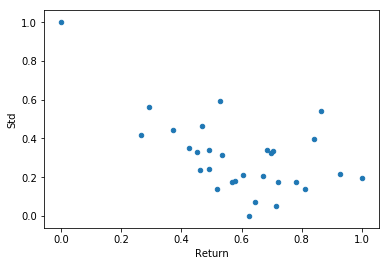

In [403]:
norma.plot(kind='scatter',x='Return',y='Std')

# Query 6.3
Cluster the 30 stocks according to their mean annual Volatilities and Returns using K-means clustering. Identify the optimum number of clusters using the Elbow curve method

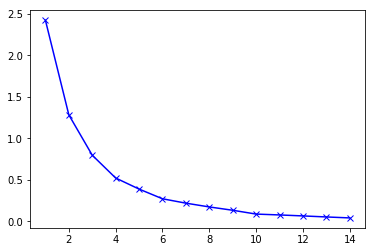

In [404]:

distance=[]
K=range(1,15)
for k in K:
    km=KMeans(n_clusters=k)
    km=km.fit(norma)
    distance.append(km.inertia_)
plt.plot(K,distance,'bx-')

In [405]:
print('Since there is no sharp turn in above graph, so we have to approximate k value.')
print('From the graph we can see that variance stabilizes between 5 and 6, so lets take value of k as 5')

Since there is no sharp turn in above graph, so we have to approximate k value.
From the graph we can see that variance stabilizes between 5 and 6, so lets take value of k as 5


# Query 6.4
Prepare a separate Data frame to show which stocks belong to the same cluster 

In [406]:
km1=KMeans(n_clusters=5)
km1=km1.fit(hello)
hello2=pd.DataFrame({'Clusters':km1.labels_,'Company':name})
rac=pd.concat([hello2,norma],axis=1)

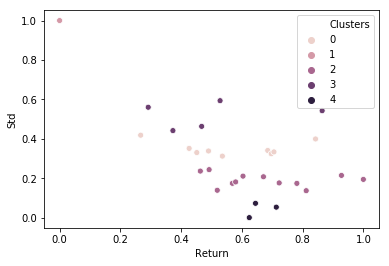

In [407]:
sns.scatterplot(x='Return',y='Std',hue='Clusters',legend='full',data=rac)

In [408]:
rac

,Clusters,Company,Return,Std
0,0,ASHOKA,0.490212,0.338076
1,0,FORTIS,0.535857,0.312040
2,2,IDFC,0.463325,0.236121
3,4,IRCON,0.624484,0.000000
4,3,ITDC,0.373068,0.441548
5,3,JETAIRWAYS,0.291781,0.560038
6,2,JKLAKSHMI,0.519079,0.138784
7,0,NCC,0.685263,0.340778
8,2,PVR,0.722933,0.176052
9,1,RCOM,0.000000,1.000000
